In [145]:
import os
import shutil

import pandas as pd
import pydotplus
import numpy as np

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

In [4]:
DATA_DIR = 'programmers'
INFO_PATH = os.path.join(DATA_DIR, 'programmers-info.txt')
DATA_PATH = os.path.join(DATA_DIR, 'programmers.xlsx')

In [9]:
with open(INFO_PATH, 'r', encoding='cp1251') as f:
    info = f.read().replace('\n', '  ')

> {{info}}

In [29]:
f_langs = 'How many programming languages did you study during your BSc/MSc/PhD program (in total)?'
f_courses = 'How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?'
f_projects = 'How many software engineering projects did you take part?'
f_progs = 'How many programmers took part in your most notable software engineering project?'
f_lines = 'How many lines of source code has the most notable software engineering project you took part (in thousands)?'
f_slines = 'How many lines of source code did you create in the most notable software engineering project you took part (in thousands)? '
f_res = 'How many conference talks did you give on your research?'
f_papers = 'How many papers did you publish on your research?'
f_old = 'How old are you (in full years)?'
f_gen = 'Your gender is'

In [41]:
dtype={
    f_langs: np.int32,
    f_courses: np.int32,
    f_projects: np.int32,
    f_progs: np.int32,
    f_lines: np.float32,
    f_slines: np.float32,
    f_res: np.int32,
    f_papers: np.int32,
    f_old: np.int32,
    f_gen: np.object
}

In [42]:
data = pd.read_excel(DATA_PATH)

In [43]:
data.head()

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?,Your gender is
0,5,10,6,10,10.0,1.0,30,50,33,Male
1,3,4,8,1,10.0,10.0,15,20,46,Male
2,8,4,3,2,5.0,5.0,2,2,22,Male
3,3,0,4,3,2.0,1.0,5,20,28,Female
4,8,6,6,6,1.5,1.5,8,8,31,Male


In [44]:
data.describe()

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.157895,9.894737,8.157895,5.473684,13.394737,5.526316,14.684211,23.052632,32.578947
std,3.919512,7.922505,11.246052,5.984874,22.647405,5.453016,23.190162,38.760624,12.098282
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,20.000000
25%,3.000000,4.500000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,25.000000
50%,5.000000,7.000000,5.000000,3.000000,5.000000,5.000000,8.000000,8.000000,28.000000
75%,8.000000,11.000000,8.000000,5.500000,10.000000,8.500000,15.000000,20.000000,34.000000
max,15.000000,28.000000,50.000000,25.000000,100.000000,20.000000,100.000000,150.000000,62.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
How many programming languages did you study during your BSc/MSc/PhD program (in total)?                                         19 non-null int64
How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?    19 non-null int64
How many software engineering projects did you take part?                                                                        19 non-null int64
How many programmers took part in your most notable software engineering project?                                                19 non-null int64
How many lines of source code has the most notable software engineering project you took part (in thousands)?                    19 non-null float64
How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?      19 non-null float64
How many co

In [49]:
cat_features = [f_gen]

In [54]:
encoder = OneHotEncoder(sparse=False)

In [57]:
cats = encoder.fit_transform(data[cat_features])
cats_df = pd.DataFrame({k:v for k, v in zip(encoder.get_feature_names(), cats.T)})

In [58]:
data_num = pd.concat([data.drop(cat_features, axis=1), cats_df], axis=1, sort=False)

In [59]:
data_num.head()

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?,x0_Female,x0_Male
0,5,10,6,10,10.0,1.0,30,50,33,0.0,1.0
1,3,4,8,1,10.0,10.0,15,20,46,0.0,1.0
2,8,4,3,2,5.0,5.0,2,2,22,0.0,1.0
3,3,0,4,3,2.0,1.0,5,20,28,1.0,0.0
4,8,6,6,6,1.5,1.5,8,8,31,0.0,1.0


## Часть 1

In [64]:
full = KMeans(3).fit(data_num)

In [65]:
full.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
      dtype=int32)

In [66]:
full.cluster_centers_

array([[  5.9375 ,  10.5    ,   6.0625 ,   4.375  ,   7.78125,   5.     ,
          8.3125 ,  11.5625 ,  29.375  ,   0.25   ,   0.75   ],
       [  9.5    ,   7.     ,  27.5    ,  14.5    ,  15.     ,   7.5    ,
         70.     , 125.     ,  62.     ,   0.     ,   1.     ],
       [  3.     ,   6.     ,   3.     ,   5.     , 100.     ,  10.     ,
          6.     ,   3.     ,  25.     ,   1.     ,   0.     ]])

In [72]:
def show_with_labels(labels):
    return pd.concat([data, pd.DataFrame({'label': labels})], axis=1, sort=False)

In [73]:
show_with_labels(full.labels_)

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?,Your gender is,label
0,5,10,6,10,10.0,1.0,30,50,33,Male,0
1,3,4,8,1,10.0,10.0,15,20,46,Male,0
2,8,4,3,2,5.0,5.0,2,2,22,Male,0
3,3,0,4,3,2.0,1.0,5,20,28,Female,0
4,8,6,6,6,1.5,1.5,8,8,31,Male,0
5,2,5,20,2,5.0,1.0,20,18,35,Male,0
6,15,8,50,25,20.0,10.0,100,100,62,Male,1
7,4,6,5,4,10.0,5.0,40,150,62,Male,1
8,15,10,10,5,20.0,5.0,8,18,31,Male,0
9,1,3,0,1,1.0,1.0,5,5,24,Female,0


In [76]:
prog = KMeans(3).fit(data_num[[f_courses, f_langs, f_lines, f_progs, f_projects, f_slines, f_old]])

In [77]:
show_with_labels(prog.labels_)

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?,Your gender is,label
0,5,10,6,10,10.0,1.0,30,50,33,Male,1
1,3,4,8,1,10.0,10.0,15,20,46,Male,1
2,8,4,3,2,5.0,5.0,2,2,22,Male,1
3,3,0,4,3,2.0,1.0,5,20,28,Female,1
4,8,6,6,6,1.5,1.5,8,8,31,Male,1
5,2,5,20,2,5.0,1.0,20,18,35,Male,1
6,15,8,50,25,20.0,10.0,100,100,62,Male,0
7,4,6,5,4,10.0,5.0,40,150,62,Male,1
8,15,10,10,5,20.0,5.0,8,18,31,Male,1
9,1,3,0,1,1.0,1.0,5,5,24,Female,1


In [78]:
researcher = KMeans(3).fit(data_num[[f_old, f_res, f_langs, f_courses, f_res, f_papers]])

In [79]:
show_with_labels(researcher.labels_)

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?,Your gender is,label
0,5,10,6,10,10.0,1.0,30,50,33,Male,0
1,3,4,8,1,10.0,10.0,15,20,46,Male,0
2,8,4,3,2,5.0,5.0,2,2,22,Male,0
3,3,0,4,3,2.0,1.0,5,20,28,Female,0
4,8,6,6,6,1.5,1.5,8,8,31,Male,0
5,2,5,20,2,5.0,1.0,20,18,35,Male,0
6,15,8,50,25,20.0,10.0,100,100,62,Male,2
7,4,6,5,4,10.0,5.0,40,150,62,Male,1
8,15,10,10,5,20.0,5.0,8,18,31,Male,0
9,1,3,0,1,1.0,1.0,5,5,24,Female,0


## Часть 2

In [88]:
n = data.shape[0] // 3
m = data.shape[0] - n

In [121]:
np.random.seed(42)
position = ['TeamLeader', 'Researcher', 'Programmer']
pos_to_id = {v:k for k, v in enumerate(position)}
positions = position * n + [np.random.choice(position)]
np.random.shuffle(positions)

In [117]:
dt = data.copy()

In [119]:
dt['position'] = positions

In [135]:
dt_num = data_num.copy()

In [136]:
pos_encoder = OneHotEncoder(sparse=False)

In [137]:
one_hot_pos = pos_encoder.fit_transform(dt[['position']])

In [138]:
dt_num = pd.concat([dt_num, pd.DataFrame({k: v for k, v in zip(pos_encoder.get_feature_names(), one_hot_pos.T)})], axis=1, sort=False)


In [139]:
dt_num

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?,x0_Female,x0_Male,x0_Programmer,x0_Researcher,x0_TeamLeader
0,5,10,6,10,10.0,1.0,30,50,33,0.0,1.0,0.0,0.0,1.0
1,3,4,8,1,10.0,10.0,15,20,46,0.0,1.0,1.0,0.0,0.0
2,8,4,3,2,5.0,5.0,2,2,22,0.0,1.0,0.0,0.0,1.0
3,3,0,4,3,2.0,1.0,5,20,28,1.0,0.0,0.0,1.0,0.0
4,8,6,6,6,1.5,1.5,8,8,31,0.0,1.0,1.0,0.0,0.0
5,2,5,20,2,5.0,1.0,20,18,35,0.0,1.0,1.0,0.0,0.0
6,15,8,50,25,20.0,10.0,100,100,62,0.0,1.0,1.0,0.0,0.0
7,4,6,5,4,10.0,5.0,40,150,62,0.0,1.0,0.0,0.0,1.0
8,15,10,10,5,20.0,5.0,8,18,31,0.0,1.0,1.0,0.0,0.0
9,1,3,0,1,1.0,1.0,5,5,24,1.0,0.0,0.0,1.0,0.0


In [166]:
ac = AgglomerativeClustering(6).fit(dt_num)

In [167]:
pd.concat([dt, pd.DataFrame({'label': ac.labels_})], axis=1, sort=False)

,How many programming languages did you study during your BSc/MSc/PhD program (in total)?,How many courses related to Programming and/or Software Engineering did you study during your BSc/MSc/PhD program (in total)?,How many software engineering projects did you take part?,How many programmers took part in your most notable software engineering project?,How many lines of source code has the most notable software engineering project you took part (in thousands)?,How many lines of source code did you create in the most notable software engineering project you took part (in thousands)?,How many conference talks did you give on your research?,How many papers did you publish on your research?,How old are you (in full years)?,Your gender is,position,label
0,5,10,6,10,10.0,1.0,30,50,33,Male,TeamLeader,0
1,3,4,8,1,10.0,10.0,15,20,46,Male,Programmer,0
2,8,4,3,2,5.0,5.0,2,2,22,Male,TeamLeader,2
3,3,0,4,3,2.0,1.0,5,20,28,Female,Researcher,0
4,8,6,6,6,1.5,1.5,8,8,31,Male,Programmer,0
5,2,5,20,2,5.0,1.0,20,18,35,Male,Programmer,0
6,15,8,50,25,20.0,10.0,100,100,62,Male,Programmer,3
7,4,6,5,4,10.0,5.0,40,150,62,Male,TeamLeader,4
8,15,10,10,5,20.0,5.0,8,18,31,Male,Programmer,0
9,1,3,0,1,1.0,1.0,5,5,24,Female,Researcher,2


In [168]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

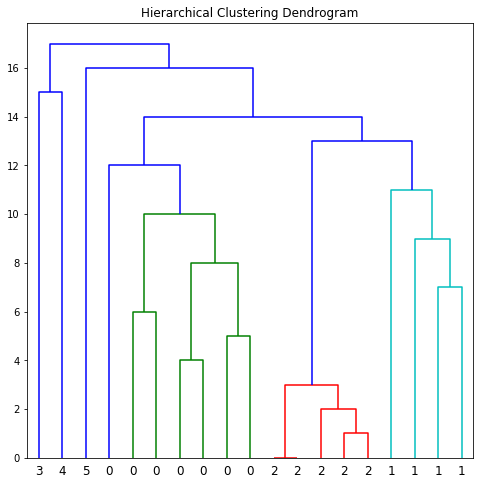

In [169]:
plt.figure(figsize=(8, 8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, labels=ac.labels_)
plt.show()